In [57]:
# テストデータの登録
import pandas as pd
import numpy as np

data = pd.DataFrame({'output': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                     'input01': [1, 3, 5, 6, 10, 14, 8, 17, 15, 20],
                     'input02': [5, 10, 20, 30, 35, 35, 50, 70, 85, 100]},)
data

,output,input01,input02
0,10,1,5
1,20,3,10
2,30,5,20
3,40,6,30
4,50,10,35
5,60,14,35
6,70,8,50
7,80,17,70
8,90,15,85
9,100,20,100


In [58]:
# input01とoutputで単回帰分析
from sklearn import linear_model
model = linear_model.LinearRegression()

# 説明変数にinput01を利用
X = data.loc[:, ['input01']].values
# 目的変数にoutputを利用
Y = data['output'].values

# 予測モデルを作成
model.fit(X, Y)
print('モデルのパラメータ:', model.get_params())
print('回帰係数:', model.coef_)
print('切片 (誤差):', model.intercept_)
print('決定係数(X,Yの相関):', model.score(X, Y))
print('回帰式：[alcohol] = %s × [density] + %s' % (model.coef_[0], model.intercept_))

モデルのパラメータ: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
回帰係数: [4.45327487]
切片 (誤差): 10.912578788709233
決定係数(X,Yの相関): 0.8771602016326598
回帰式：[alcohol] = 4.45327486982735 × [density] + 10.912578788709233


In [59]:
# statsmodelsを使った回帰分析
import statsmodels.api as sm

model = sm.OLS(Y, sm.add_constant(X))
result = model.fit(disp=0)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     57.13
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           6.56e-05
Time:                        23:33:37   Log-Likelihood:                -37.282
No. Observations:                  10   AIC:                             78.56
Df Residuals:                       8   BIC:                             79.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9126      6.833      1.597      0.1

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


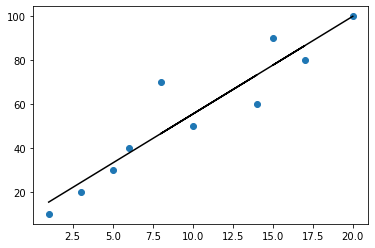

In [21]:
# グラフ化
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X), color='black')

In [60]:
# input02とoutputで単回帰分析
from sklearn import linear_model
model = linear_model.LinearRegression()

# 説明変数にinput02を利用
X = data.loc[:, ['input02']].values
# 目的変数にoutputを利用
Y = data['output'].values

# 予測モデルを作成
model.fit(X, Y)
print('モデルのパラメータ:', model.get_params())
print('回帰係数:', model.coef_)
print('切片 (誤差):', model.intercept_)
print('決定係数(X,Yの相関):', model.score(X, Y))
print('回帰式：[alcohol] = %s × [density] + %s' % (model.coef_[0], model.intercept_))

モデルのパラメータ: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
回帰係数: [0.92450766]
切片 (誤差): 14.321663019693652
決定係数(X,Yの相関): 0.946919965519528
回帰式：[alcohol] = 0.9245076586433261 × [density] + 14.321663019693652


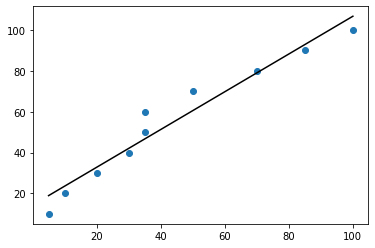

In [25]:
# グラフ化
import matplotlib.pyplot as plt
 
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, model.predict(X), color='black')

In [61]:
# 正規化して重回帰分析
from sklearn import linear_model
model = linear_model.LinearRegression()

# データフレームの各列を正規化
data2 = data.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
data2.head()

,output,input01,input02
0,-0.500000,-0.468421,-0.410526
1,-0.388889,-0.363158,-0.357895
2,-0.277778,-0.257895,-0.252632
3,-0.166667,-0.205263,-0.147368
4,-0.055556,0.005263,-0.094737


In [62]:
# 説明変数にoutput以外を利用
data2_except_output = data2.drop("output", axis=1)
X = data2_except_output
# 目的変数にoutputを利用
Y = data2['output'].values
 
# 予測モデルを作成
model.fit(X, Y)
 
# 偏回帰係数
print(pd.DataFrame({"name":X.columns,
                    "result":np.abs(model.coef_)}).sort_values(by='result'))
 
print('切片(誤差):', model.intercept_)

      name    result
0  input01  0.295143
1  input02  0.707205
切片(誤差): 1.6679414843100476e-17


In [63]:
# statsmodelsを使った重回帰分析
import statsmodels.api as sm

# 予測モデルを作成
model = sm.OLS(Y, sm.add_constant(X))
result = model.fit(disp=0)
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     87.64
Date:                Fri, 20 Mar 2020   Prob (F-statistic):           1.11e-05
Time:                        23:36:48   Log-Likelihood:                 13.530
No. Observations:                  10   AIC:                            -21.06
Df Residuals:                       7   BIC:                            -20.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.388e-17      0.024  -5.87e-16      1.0

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
